# Maths - Form & Function: Chapter 2 (From Whole Numbers to Rational Numbers)

In [1]:
from sympy import *
from sympy.printing.latex import LatexPrinter

class CustomLatexPrinter(LatexPrinter):
    def _print_Idx(self, expr):
        return expr.name

    @classmethod
    def printer(cls, expr, **kwargs):
        return cls(kwargs).doprint(expr)

init_printing(use_latex = "mathjax", latex_printer = CustomLatexPrinter.printer)

## 1. Properties of Natural Numbers

The natural numbers arise from:

- listing
- counting
- comparing

In [2]:
S.Naturals

ℕ

In [3]:
k, m, n = symbols("k, m, n", integer = True)

# Commutative law part 1: Addition
Eq(
    m + 0,
    m
)

True

In [4]:
# Commutative law part 2: Addition
Eq(
    m + n,
    n + m
)

True

In [5]:
# Associative law: Addition
Eq(
    k + (m + n),
    (k + m) + n
)

True

In [6]:
# Commutative law part 1: Multiplication
Eq(
    m * 1,
    m
)

True

In [7]:
# Commutative law part 2: Multiplication
Eq(
    m * n,
    n * m
)

True

In [8]:
# Associative law: Multiplication
Eq(
    k * (m * n),
    (k * m) * n
)

True

In [9]:
# Distributive law
Eq(
    k * (m + n),
    k * m + k * n
).simplify()

True

In [10]:
# Remainders of square numbers always 0 or 1
FiniteSet(0, 1).contains((k**2) % 4).doit()

 2               
k  mod 4 ∈ {0, 1}

In [11]:
b, i, n = symbols("b, i, n", domain = S.Naturals)
a = IndexedBase("a")
k = Idx("k", range = (0, i))

expansion = summation(a[k] * b**k, k)
Eq(n, expansion)

      i          
     ___         
     ╲           
      ╲    k     
n =   ╱   b ⋅a[k]
     ╱           
     ‾‾‾         
    k = 0        

In [12]:
# Finding decimal expansion of 123
a_coefs = [1, 2, 3][::-1]
j = len(a_coefs) - 1
decimal_expansion = summation(a[k] * b**k, (k, 0, j))

# decimal expansion
coefs_dic = {a[j]: a_coefs[j] for j in range(3)}
decimal_expansion.subs(b, 10).subs(coefs_dic)

123

# 2. The Peano Postulates

The Peano postulates emerge from the fact that both addition and multiplication can be described in terms of the number 0 & the single operation "add 1"; the postulates are the folowing axioms on that single operation:

1. 0 is a number
2. if *n* is a number, so is its successor *sn*
3. 0 is not a successor (*sn* is never 0)
4. 2 numbers *n*, *m* with the same successor are equal
5. Let *P* be a property of natural numbers; if 0 has *P* & *sn* has *P* where *n* does, then *P* holds for all natural numbers.

In [13]:
from sympy.core.assumptions import assumptions

m, n = symbols("m, n", domain = S.Naturals0)

class s(Function):
    """ The successor function. """
    @classmethod
    def eval(cls, n):
        if n.is_Number:
            if S.Naturals0.contains(n):
                return n + 1
            
s(0)

1

In [14]:
# postulate i
S.Naturals0.contains(0)

True

In [15]:
# postulate ii
(S.Naturals0.contains(n)) >> (S.Naturals0.contains(s(n)))

(n ∈ ℕ₀) → (s(n) ∈ ℕ₀)

In [16]:
# postulate iii
Not(Eq(0, s(n)))

0 ≠ s(n)

In [17]:
# postulate iv
Implies(
    Eq(s(n), s(m)),
    Eq(n, m)
)

s(n) = s(m) → n = m

In [18]:
a = IndexedBase("a")
i = Idx("i", range = (1, n))

first_n_squares = summation(a[i]**2, i)
first_n_squares

  n        
 ___       
 ╲         
  ╲       2
  ╱   a[i] 
 ╱         
 ‾‾‾       
i = 1      

In [19]:
coefs = list(range(1, 4))
coefs_dic = {a[j]: coefs[j-1] for j in range(1, 4)}

first_n_squares = summation(a[i]**2, (i, 1, 3))
first_n_squares.subs(coefs_dic)

14

In [20]:
k = symbols("k")

# Recursive addition
Eq(k + 0, k)

True

In [21]:
Eq(k + s(n), s(k + n))

k + s(n) = s(k + n)

In [22]:
# Recursive multiplication
Eq(k * 0, 0)

True

In [23]:
Eq(k * s(n), k + (k * n))

k⋅s(n) = k⋅n + k

In [24]:
# Recursive Exponentiation
Eq(k**0, 1)

True

In [25]:
Eq(k**s(n), k * (k**n))

 s(n)      n
k     = k⋅k 

In [26]:
class recursiveAddition(Function):
    @classmethod
    def eval(cls, n):
        if n == 0:
            return k
        else:
            return k + n

recursiveAddition(0)

k

In [27]:
recursiveAddition(s(0))

k + 1

In [28]:
recursiveAddition(s(1))

k + 2

In [29]:
class recursiveMultiplication(Function):
    @classmethod
    def eval(cls, n):
        if n == 0:
            return 0
        else:
            return k * n
        
recursiveMultiplication(0)

0

In [30]:
recursiveMultiplication(s(0))

k

In [31]:
recursiveMultiplication(s(1))

2⋅k

In [32]:
class recursiveExponentiation(Function):
    @classmethod
    def eval(cls, n):
        if n == 0:
            return 1
        else:
            return k**n

recursiveExponentiation(0)

1

In [33]:
recursiveExponentiation(s(0))

k

In [34]:
recursiveExponentiation(s(1))

 2
k 

In [35]:
f = Function("f")
g = Function("g")

Eq(f(0), a), Eq(f(s(m)), g(f(m)))

(f(0) = a, f(s(m)) = g(f(m)))

**Uniqueness Theorem**

*The set-theoretic Peano postulates determine the collection **N** of natural numbers uniquely, up to an isomorphism of the structure given by 0 and successor.*

## 3. Natural Numbers Described by Recursion

General Point: the axioms needed to describe a Mathematical structure are themselves by no means unique. The recursion theorum for example is a convenient form of axiom.

In [36]:
from sympy import pprint
from sympy.categories import *

N = S.Naturals
S_ob = Object("S")

s = NamedMorphism(N, N, "s")
sDash = NamedMorphism(S_ob, S_ob, "sDash")
h = NamedMorphism(N, S_ob, "h")
i = NamedMorphism(S_ob, N, "i")

d = Diagram([s, sDash, h, i])

drawer = XypicDiagramDrawer()
print(drawer.draw(d, DiagramGrid(d)))
# https://quicklatex.com/
# Add `\usepackage[all]{xy}` to the preamble

\xymatrix{
S \ar[r]^{i} \ar@(u,l)[]^{sDash} & \mathbb{N} \ar@/^3mm/[l]^{h} \ar@(r,u)[]^{s} 
}



In [37]:
x = symbols("x")

N = S.Naturals0
S_ob = ConditionSet(x, N.contains(x))
S_ob

{x | (x ∈ ℕ₀)}

In [38]:
-1 in S_ob

False

In [39]:
0 in S_ob

True

In [40]:
class i(Function):
    @classmethod
    def eval(cls, arg1):
        if arg1 == S_ob:
            return N
        
i(S_ob)

ℕ₀

In [41]:
class zero(Function):
    @classmethod
    def eval(cls):
        return S_ob
    
zero()

{x | (x ∈ ℕ₀)}

In [42]:
class sDash(Function):
    @classmethod
    def eval(cls, arg1):
        if arg1 == S_ob:
            return S_ob
    
sDash(S_ob)

{x | (x ∈ ℕ₀)}

In [43]:
class h(Function):
    @classmethod
    def eval(cls, arg1):
        if arg1 == N:
            return S_ob
        
h(N)

{x | (x ∈ ℕ₀)}

In [44]:
class f(Function):
    @classmethod
    def eval(cls, arg1):
        if arg1 == N:
            return i(h(arg1))
        
f(N)

ℕ₀

In [45]:
class s(Function):
    @classmethod
    def eval(cls, arg1):
        if arg1 == N:
            return N
        
s(N)

ℕ₀

In [46]:
sDash(h(N)) == h(s(N))

True

In [47]:
s(f(N)) == f(s(N)) # identity function

True

In [48]:
f(N) == i(h(N))

True

## 4. Number Theory

In [49]:
m, n, q, r = symbols("m, n, q, r", integer = True)

division_algorithm = Eq(m, n*q + r)
division_algorithm

m = n⋅q + r

In [50]:
division_algorithm.subs([(m, 10), (n, 3), (q, 3), (r, 1)])

True

In [51]:
# Show list of primes
sieve._reset()
sieve.extend(17)
sieve._list

array('l', [2, 3, 5, 7, 11, 13, 17])

In [52]:
# The last prime on the above list
factors17 = factorint(17, visual = True)
factors17

  1
17 

In [53]:
factors17.doit()

17

In [54]:
# Even numbers other than 2 cannot be prime
factors18 = factorint(18, visual = True)
factors18

 1  2
2 ⋅3 

In [55]:
factors18.doit()

18

Unique Factorization Theorum:

Every number *n* can be factored into a product of primes (though some may be repeated).

- Primes: numbers divided only by themselves & 1
- Factored: repeatedly divided down to numbers whose product is the original
- Prime Factorization: factorization down to prime numbers only

In [56]:
[factorint(x, visual = True) for x in sieve._list]

⎡ 1   1   1   1    1    1    1⎤
⎣2 , 3 , 5 , 7 , 11 , 13 , 17 ⎦

In [57]:
[factorint(x, visual = True) for x in range(1, 18) if not(isprime(x))]

⎡    2   1  1   3   2   1  1   2  1   1  1   1  1   4⎤
⎣1, 2 , 2 ⋅3 , 2 , 3 , 2 ⋅5 , 2 ⋅3 , 2 ⋅7 , 3 ⋅5 , 2 ⎦

In [58]:
factorint(12, visual = True)

 2  1
2 ⋅3 

In [59]:
factorint(16, visual = True)

 4
2 

In [60]:
common_factor = list(set(factorint(12).keys()) & set(factorint(16).keys()))
common_factor

[2]

In [61]:
greatest_common_divisor = igcd(12, 16)
greatest_common_divisor

4

In [62]:
factorized_numbers = 2
common_factor[0] * factorized_numbers == greatest_common_divisor

True

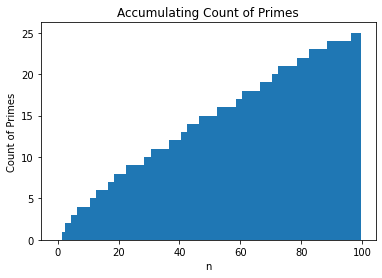

In [63]:
import matplotlib.pyplot as plt

prime_range = range(0, 100)
prime_count = [primepi(n) for n in prime_range]

plt.bar(prime_range, prime_count, width = 1)
plt.title("Accumulating Count of Primes")
plt.xlabel("n")
plt.ylabel("Count of Primes")
plt.show()

In [64]:
x, y, z = symbols("x, y, z", integers = True)

fermats = Eq(x**2 + y**2, z**2)
fermats

 2    2    2
x  + y  = z 

In [65]:
fermats.subs([(x, 3), (y, 4), (z, 5)])

True

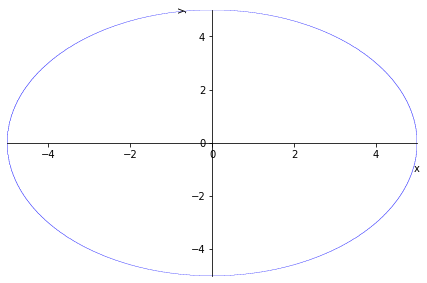

In [66]:
plot_implicit(Eq(x**2 + y**2, z**2).subs(z, 5))

In [67]:
from sympy.solvers.diophantine.diophantine import sum_of_squares

list(sum_of_squares(25, 2))

[(3, 4)]

In [68]:
from sympy.solvers.diophantine.diophantine import diop_DN

D = 2
N = 1
diop_DN(D, N)

[(3, 2)]

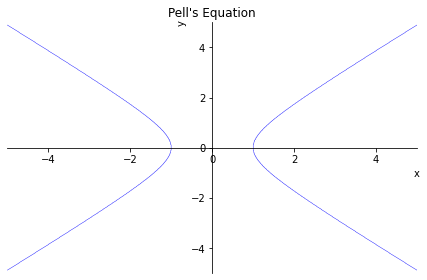

In [69]:
# n (sometimes D) here must be positive non-square integer
plot_implicit(Eq(x**2 - (n * y**2), 1).subs(n, 1), title = "Pell's Equation")

## 5. Integers

In [70]:
S.Integers.issuperset(S.Naturals0)

True

In [71]:
from sympy.functions.elementary.piecewise import *

n, np, m, mp, x = symbols("n, np, m, mp, x", Naturals0 = True)

Piecewise(
    (Eq(n + (-m), n - m, evaluate = False), n >= m),
    (Eq(n + (-m), -(m - n), evaluate = False), n < m),
    (Eq((-n) + (-m), -(n + m), evaluate = False), True),
    evaluate = False
)

⎧-m + n = -m + n  for n ≥ m
⎪                          
⎨-m + n = -m + n  for n < m
⎪                          
⎩-m - n = -m - n  otherwise

In [72]:
Z_subtraction = Eq(n + x, m)
Z_subtraction

n + x = m

In [73]:
ordered_pair1 = [(n, 10), (m, 5)]
subs_Z_subtraction = Z_subtraction.subs(ordered_pair1)
subs_Z_subtraction

x + 10 = 5

In [74]:
solve(subs_Z_subtraction, x)

[-5]

In [75]:
class ordered_pair_addition(Function):
    @classmethod
    def eval(cls, pair1, pair2):
        m, n = pair1
        mp, np = pair2
        return (m + mp, n + np)

ordered_pair_addition((2, 0), (0, 3))

(2, 3)

In [76]:
ordered_pair_addition((-2, 0), (0, -3))

(-2, -3)

In [77]:
ordered_pair_addition((-2, 0), (0, -3))

(-2, -3)

In [78]:
class ordered_pair_product(Function):
    @classmethod
    def eval(cls, pair1, pair2):
        m, n = pair1
        mp, np = pair2
        return ((m * mp) + (n * np), (m * np) + (n * mp))
    
ordered_pair_product((2, 0), (0, 3))

(0, 6)

In [79]:
ordered_pair_product((-2, 0), (0, 3))

(0, -6)

In [80]:
ordered_pair_product((-2, 0), (0, -3))

(0, 6)

In [81]:
ordered_pair_product((2, 0), (0, 3))

(0, 6)

In [82]:
ordered_pair_product((-2, 0), (2, 3))

(-4, -6)

In [83]:
h = symbols("h")

a1, a2 = ordered_pair_product((-2, 0), (2, 3))
b1, b2 = ordered_pair_product((-2 + h, 0 + h), (2 + h, 3 + h))

Eq(Add(a1, -a2), Add(b1, -b2)).subs(h, 1)

True

In [84]:
Eq(Add(a1, -a2), Add(b1, -b2)).subs(h, 2)

True

In [85]:
r, s = symbols("r, s")

ExprCondPair(
    Eq((m, n), (r, s)),
    Eq(m + s, n + r)
)

((m, n) = (r, s), m + s = n + r)

## 6. Rational Numbers

Fractions are the response to the inability of numbers to always be divided evenly into whole numbers:

In [86]:
m, mp, n, np = symbols("m, m`, n, n`", interger = True, positive = True)

rational_sum_1 = (m / n) + (mp / np)
rational_sum_2 = (m * np + mp * n) / (n * np)

Eq(rational_sum_1, rational_sum_2)

m   m`   m⋅n` + m`⋅n
─ + ── = ───────────
n   n`       n⋅n`   

In [87]:
rational_sum_1.subs([(m, 2), (n, 4), (mp, 1), (np, 4)])

3/4

In [88]:
rational_sum_2.subs([(m, 2), (n, 4), (mp, 1), (np, 4)])

3/4

In [89]:
rational_mul_1 = (m / n) * (mp / np)
rational_mul_2 = (m * mp) / (n * np)

rational_mul_1.subs([(m, 2), (n, 4), (mp, 1), (np, 4)])

1/8

In [90]:
rational_mul_2.subs([(m, 2), (n, 4), (mp, 1), (np, 4)])

1/8

In [91]:
S.Rationals.is_superset(S.Naturals)

True

In [92]:
class Q_sum(Function):
    @classmethod
    def eval(cls, pair1, pair2):
        m, n = pair1
        mp, np = pair2
        return ((m * np) + (n * mp), n * np)
    
Q_sum((2, 4), (1, 4))

(12, 16)

In [93]:
class Q_mul(Function):
    @classmethod
    def eval(cls, pair1, pair2):
        m, n = pair1
        mp, np = pair2
        return (m * mp, n * np)
    
Q_mul((2, 4), (1, 4))

(2, 16)

# 7. Congruence

In [94]:
(6 + 7) % 10

3

In [95]:
(8 + 7) % 10

5

In [96]:
(8 * 3) % 10

4

In [97]:
(3 * 9) % 10

7

In [98]:
from sympy.ntheory.factor_ import digits

class casting_out_9s(Function):
    @classmethod
    def eval(cls, arg1, arg2):
        total = arg1 * arg2
        total_sum = sum(digits(total, 10)[1:])
        total_sum = sum(digits(total_sum, 10)[1:])
        arg1_sum = sum(digits(arg1, 10)[1:])
        arg2_sum = sum(digits(arg2, 10)[1:])
        args_sum = sum(digits(arg1_sum * arg2_sum, 10)[1:])
        return Eq(args_sum, total_sum)
        
casting_out_9s(32, 27)

True

In [99]:
a, b, m = symbols("a, b, m")

congruence = Equivalent(
    Eq(a, b % m),
    Eq((a - b) % m, 0)
)
congruence

a = b mod m ⇔ (a - b) mod m = 0

In [100]:
congruence.subs([(a, 20), (b, 9), (m, 2)])

True

In [101]:
a, b, c, d, m = symbols("a, b, c, d, m")

congruent_sum = ExprCondPair(
    Eq((a + c) % m, (b + d) % m),
    And(Eq(a % m, b % m), Eq(c % m, d % m))
)
congruent_sum

((a + c) mod m = (b + d) mod m, a mod m = b mod m ∧ c mod m = d mod m)

In [102]:
congruent_sum.subs([(a, 20), (b, 3), (c, 18), (d, 8), (m, 8)])

(False, False)

In [103]:
congruent_sum.subs([(a, 20), (b, 4), (c, 25), (d, 1), (m, 8)])

(True, True)

In [104]:
congruent_product = ExprCondPair(
    Eq((a * c) % m, (b * d) % m),
    And(Eq(a % m, b % m), Eq(c % m, d % m))
)
congruent_product

(a⋅c mod m = b⋅d mod m, a mod m = b mod m ∧ c mod m = d mod m)

In [105]:
congruent_product.subs([(a, 21), (b, 3), (c, 18), (d, 8), (m, 8)])

(False, False)

In [106]:
congruent_product.subs([(a, 20), (b, 4), (c, 25), (d, 1), (m, 8)])

(True, True)

In [107]:
p = symbols("p", is_prime = True)

euler_phi1 = Eq(totient(p), p - 1)
euler_phi1

totient(p) = p - 1

In [108]:
euler_phi1.subs(p, 7)

True

In [109]:
euler_phi1.subs(p, 6)

False

In [110]:
k = symbols("k")

lft = totient(p**k)
rgt = (p - 1) * (p**(k - 1))
euler_phi2 = Eq(lft, rgt)
euler_phi2

       ⎛ k⎞    k - 1        
totient⎝p ⎠ = p     ⋅(p - 1)

In [111]:
euler_phi2.subs([(p, 7), (k, 2)])

True

In [112]:
lft.subs([(p, 7), (k, 2)])

42

In [113]:
rgt.subs([(p, 7), (k, 2)])

42

In [114]:
euler_phi3 = Eq(totient(m * n), totient(m) * totient(n))
euler_phi3

totient(m⋅n) = totient(m)⋅totient(n)

In [115]:
# m & n have to have a GCD of 1
euler_phi3.subs([(m, 5), (n, 3)])

True

In [116]:
# Here without a GCD of 1
euler_phi3.subs([(m, 6), (n, 3)])

False

In [117]:
a, r, m = symbols("a, r, m")

class congruenceClass():

    def __new__(cls, *args):
        if len(args) < 1:
            return EmptySet
        else:
            subs = [(r, args[0]), (m, args[1])]
            return ConditionSet(a, Eq(a % m, r % m).subs(subs), S.Integers)
        
    
Cmr = congruenceClass(1, 5)
Cmr

{a | a ∊ ℤ ∧ (a mod 5 = 1)}

In [118]:
Cms = congruenceClass(3, 5)
Cms

{a | a ∊ ℤ ∧ (a mod 5 = 3)}

In [119]:
Cmr_as = [x for x in range(-10, 10) if x in Cmr]
Cmr_as

[-9, -4, 1, 6]

In [120]:
Cms_bs = [x for x in range(-10, 10) if x in Cms]
Cms_bs

[-7, -2, 3, 8]

In [121]:
Cmr_plus_Cms_0 = congruenceClass(Cmr_as[0] + Cms_bs[0], 5)
Cmr_plus_Cms_0

{a | a ∊ ℤ ∧ (a mod 5 = 4)}

In [122]:
Cmr_plus_Cms_0_as = [x for x in range(-10, 10) if x in Cmr_plus_Cms_0]
Cmr_plus_Cms_0_as

[-6, -1, 4, 9]

In [123]:
Cmr_plus_Cms_2 = congruenceClass(Cmr_as[2] + Cms_bs[2], 5)
Cmr_plus_Cms_2

{a | a ∊ ℤ ∧ (a mod 5 = 4)}

In [124]:
Cmr_plus_Cms_2_as = [x for x in range(-10, 10) if x in Cmr_plus_Cms_2]
Cmr_plus_Cms_2_as

[-6, -1, 4, 9]

In [125]:
Cmr_plus_Cms_0_as == Cmr_plus_Cms_2_as

True

3 descriptions of algebra of integers module *m*:

- ordinary integers with new equality; congurence modulo *m*
- algebra of remainders modulo *m*
- algebra of congruence classes, modulo *m*

In [126]:
x = symbols("x", Integer = True)

x_sqr_mod_4 = FiniteSet(1, 2).contains(x**2 % 4)
x_sqr_mod_4

 2               
x  mod 4 ∈ {1, 2}

In [127]:
x_sqr_mod_4.subs(x, 19)

True

In [128]:
x_sqr_mod_8 = FiniteSet(0, 1, 4).contains(x**2 % 8)
x_sqr_mod_8

 2                  
x  mod 8 ∈ {0, 1, 4}

In [129]:
x_sqr_mod_8.subs(x, 9)

True

In [130]:
from sympy.ntheory.modular import crt

modulos = [3, 5, 7]
remainders = [2, 3, 2]

result = crt(modulos, remainders)
result

(23, 105)

In [131]:
x = result[0]
x

23

In [132]:
N = prod(modulos)
N

105

In [133]:
[x % y == z for y, z in zip(modulos, remainders)]

[True, True, True]

# 8. Cardinal Numbers

In [134]:
Ss, Ts, Sp, Tp = symbols("S, T, S`, T`")
Ss

S

In [135]:
Sp

S`

A cardinal number can be defined as:

- card S = {S' | S $\equiv$ S'}

That is: the cardinal set S is the set of all sets S' where S' are restricted to being congruent with S.

> ... a finite cardinal *number* is just a finite set taken "modulo" cardinal eqivalence ...

There is a strong analogy between congruence class modulo *m* & cardinal numbers.

A *power set* is:

- PU = {S | S $\subset$ U}

# 9. Ordinal Numbers

poset = a partially ordered set

- ord P = {P' | P' $\in$ V$_1$ and P ~ P'}

~ here represents *ordinally equivalent*.

Arithmetic operations on finite ordinal sets work identically to those on cardinals.
But this is not the case with infinite order sets, for example:

- $N^+$ has a 1st element
- $N^-$ has no 1st element (not regarded as an infinite ordinal number)

# 10. What Are Numbers?

Alternative answers to this question are:

- any sequence of marks (with successors) used for counting or labeling
- natural numbers are finite sets with equinumerous sets regarded as equal
- natural numbers are cardinal-equivalence classes of finite sets
- natural numbers are ordinal-equivalence classes of finite ordered sets
- natural numbers are finite sets of sets linearly ordered by membership relation

This leads to the conclusion that there is no single definition of natural numbers; instead one defines the system of all natural numbers with a successor operation.

*N* is any such system which satisfies the Peano postulates.

> The natural numbers start out from elementary operations of counting, listing, and comparing; they then develop into effective tools for calculation.
The rules for calculation are formal and can be organized as the consequences of simple systems of postulates.
The consequencesof these postulates include the remarkaby varied and rich properties studied in number theory . . .

But number theory leads to other ideas:

1. calculations with *N* do not allow all substractions or divisions so require **Z** & *Q*.
2. calculations with congruences & integers modulo *m* (classes of numbers)
3. the study of sets and functions